# Теория вероятностей и математическая статистика
## Урок 8. Корреляционный анализ

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

**Задача 1**  
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy

Полученные значения должны быть равны.

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
# Несмещенная ковариация по формуле
cov = np.mean(zp*ks) - np.mean(zp) * np.mean(ks)
print("Несмещенная ковариация: ", round(cov, 2))

# Смещенная ковариация по формуле
cov_s = ((zp - zp.mean()) * (ks - ks.mean())).sum() / (zp.shape[0] - 1)
print("Смещенная ковариация: ", round(cov_s, 2))

Несмещенная ковариация:  9157.84
Смещенная ковариация:  10175.38


In [4]:
# Несмещенная ковариация с помощью функции
print(np.cov(zp, ks, ddof = 0))

# Смещенная ковариация с помощью функции
print(np.cov(zp, ks))

[[ 3494.64  9157.84]
 [ 9157.84 30468.89]]
[[ 3882.93333333 10175.37777778]
 [10175.37777778 33854.32222222]]


In [5]:
# Коэффициент корреляции Пирсона по формуле 
zp_std = np.std(zp, ddof = 0)
ks_std = np.std(ks, ddof = 0)

coef_p = cov / (zp_std * ks_std)
coef_p

0.8874900920739158

In [6]:
# Коэффициент корреляции Пирсона с помощью функции из библиотеки numpy
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [7]:
# Коэффициент корреляции Пирсона с помощью функции из библиотеки pandas
df = pd.DataFrame({'Salary': zp, 'Scoring': ks})
df[['Salary', 'Scoring']].corr()

,Salary,Scoring
Salary,1.00000,0.88749
Scoring,0.88749,1.00000


---------------------------
**Ответ:**  
*Ковариация двух величин* = 9157.84  
*Коэффициент корреляции Пирсона* = 0.89

---------------------------

**Задача 2**  
Измерены значения IQ выборки студентов,

обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

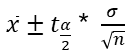

In [8]:
stud_iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

In [9]:
# Среднее арифметическое 
avg = np.mean(stud_iq)

# Несмещенная дисперсия
D = np.var(stud_iq, ddof=1)

# Критерий Стьюдента
t_2 = stats.t.ppf(0.975, (len(stud_iq)-1))

In [10]:
# Нижняя граница интервала
L_2 = avg - t_2 * np.sqrt(D/len(stud_iq))
print(f'Нижняя граница интервала = {round(L_2, 2)}')

# Верхняя граница интервала
U_2 = avg + t_2 * np.sqrt(D/len(stud_iq))
print(f'Верхняя граница интервала = {round(U_2, 2)}')

Нижняя граница интервала = 110.56
Верхняя граница интервала = 125.64


------------------
**Ответ:**  
*Нижняя граница интервала*= 110.56  
*Верхняя граница интервала* = 125.64

----------------

**Задача 3**  
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

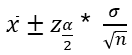

In [11]:
x = 174.2
z = 1.96
σ = 5
n = 27

# Нижняя граница интервала
L_1 = x - z * σ / np.sqrt(n)
print(f'Нижняя граница интервала = {round(L_1, 2)}')

# Верхняя граница интервала
U_1 = x + z * σ / np.sqrt(n)
print(f'Верхняя граница интервала = {round(U_1, 2)}')

Нижняя граница интервала = 172.31
Верхняя граница интервала = 176.09


------------------------------
**Ответ:**  
*Нижняя граница интервала* = 172.31  
*Верхняя граница интервала* = 176.09

------------------------------